In [1]:
# Enable module reloading
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("..")

In [4]:
import nltk
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import seaborn as sns

from contradictory_my_dear_watson.analysis import get_outliers

nltk.download('punkt')
nltk.download('wordnet')

sns.set(
    style='whitegrid',
    rc={'figure.figsize': (11, 8)}
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Analysis

In [7]:
data = pd.read_csv('data/train.csv')
data

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
...,...,...,...,...,...,...
12115,2b78e2a914,The results of even the most well designed epi...,All studies have the same amount of uncertaint...,en,English,2
12116,7e9943d152,But there are two kinds of the pleasure of do...,But there are two kinds of the pleasure of doi...,en,English,0
12117,5085923e6c,The important thing is to realize that it's wa...,"It cannot be moved, now or ever.",en,English,2
12118,fc8e2fd1fe,At the west end is a detailed model of the who...,The model temple complex is at the east end.,en,English,2


The classification of the relationship between the premise and hypothesis is `label` - 0 for entailment, 1 for neutral and 2 for contradiction. Let's map these numerical values to their textual equivalents for better readability.

In [8]:
data.label = data.label.map({0: 'entailment', 1: 'neutral', 2: 'contradiction'})

The vast majority of relationships are in english, so we will focus only on this language.

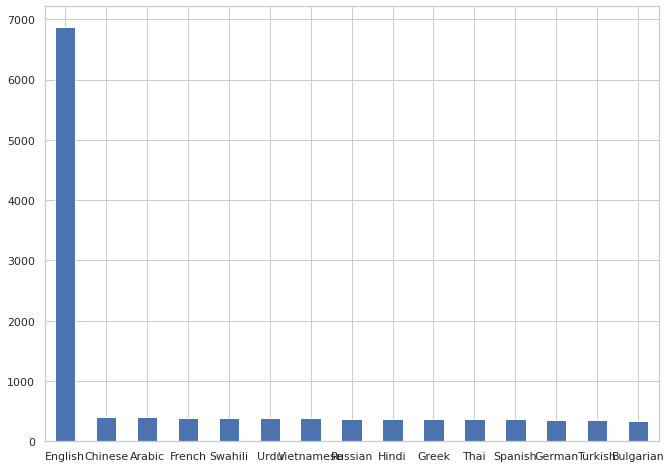

In [9]:
_ = data.language.value_counts().plot(kind='bar', rot=0)

There is quite a few data, but classification categories are quite balanced.

In [10]:
data = data[data.language == 'English']
len(data)

6870

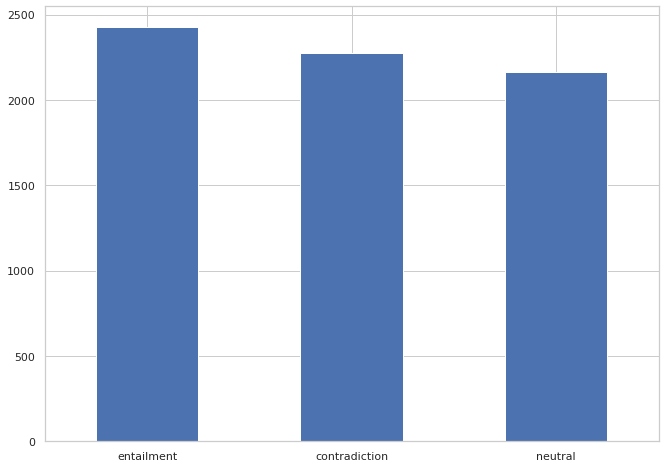

In [11]:
_ = data.label.value_counts().plot(kind='bar', rot=0)

## Lengths of Sentences

### Lengths of Premises

Premises have in average about 20 words, but there are also some upper outliers.

In [12]:
data = data.assign(premise_length=data.premise.apply(lambda x: len(word_tokenize(x))))

In [13]:
data.premise_length.mean(), data.premise_length.median()

(21.74381368267831, 19.0)

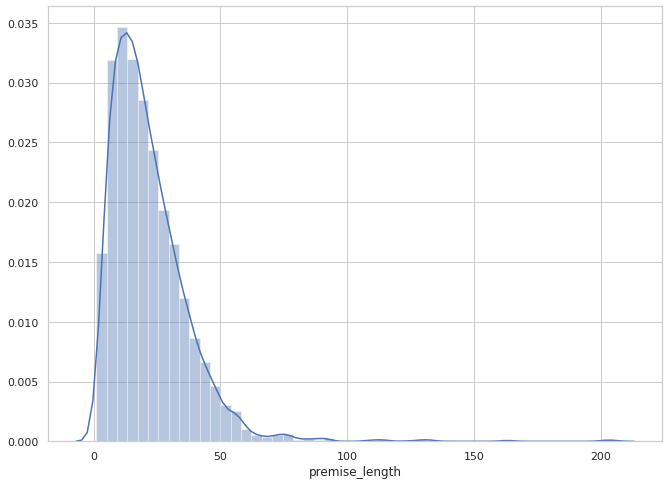

In [14]:
_ = sns.distplot(data.premise_length)

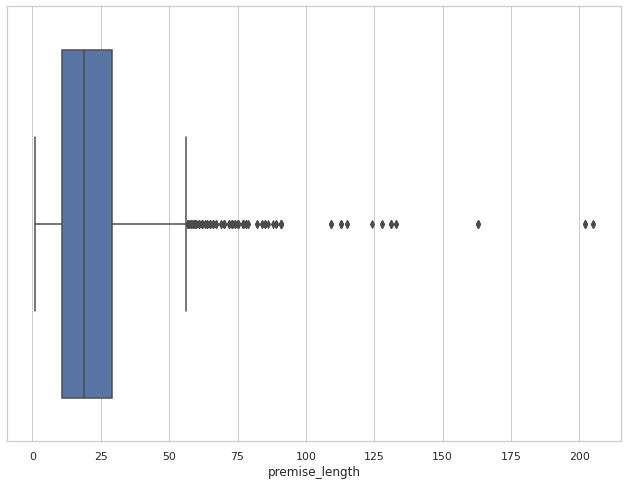

In [15]:
_ = sns.boxplot(x=data.premise_length)

Take look at outliers.

In [16]:
premises_outliers = get_outliers(data, 'premise_length')
premises_outliers

lower bound: -16.0
upper bound: 56.0


,id,premise,hypothesis,lang_abv,language,label,premise_length
187,85cc0bfc3d,"In the case of speech, Fiss appears to believe...",People in America are very well informed on co...,en,English,contradiction,57
190,13b2d2328b,and uh well if you if you got got him a power ...,He would mow your entire yard in eight minutes...,en,English,neutral,67
206,2d1499038c,exactly and when i'm sitting here on the sofa ...,A man tried to enter the house so that he coul...,en,English,neutral,65
269,5fb34600a3,"For example, if Ovitz's five-year deal was wor...",The five-year deal will be worth $100 million,en,English,neutral,62
494,be4a343e63,there and they uh they in fact they had this w...,The canal is smaller than people expect it to be,en,English,entailment,57
...,...,...,...,...,...,...,...
11898,c8652bb575,These revelations were embarrassing to Clinton...,Clinton's supporters were pleased with how the...,en,English,neutral,64
11948,483310e434,there and they uh they in fact they had this w...,This was in 1928,en,English,neutral,57
12042,1934ec8b05,and i look back on that and i bought shoes i w...,I am envious of all my debt-free churchgoing f...,en,English,neutral,205
12054,64530031ac,"On a December day in 1917, British General All...",The British General Allenby rode his horse ove...,en,English,contradiction,58


Look at quite long premise.

In [17]:
premises_outliers.loc[187].premise_length, premises_outliers.loc[187].premise

(57,
 'In the case of speech, Fiss appears to believe that the reason the American public is less enlightened than he would wish it to be concerning matters such as feminism, the rights of homosexuals, and regulation of industry is that people are denied access to the opinions and information that would enlighten them.')

Look at extra long premise.

In [18]:
premises_outliers.loc[12042].premise_length, premises_outliers.loc[12042].premise

(205,
 "and i look back on that and i bought shoes i went shopping i did not need that money i did not need it i didn't need it i shouldn't have even qualified to get it i didn't need it and it would have been a little rough i might have eaten some bologna instead of roast beef out of the deli but i did not need it and as i look back now now we're paying that back i told my son if you have to live in the ghetto to go to college do it but don't take out ten thousand dollars in loans don't do it and i don't i hope don't think he'll have to do that but i just so like we might if we didn't have those loans we could have saved in the last five years the money for that and i believe we would have because God's really put it in our heart not to get in debt you know but we have friends at church that do this on a constant basis that are totally debt free and they pay cash for everything they buy")

In [19]:
premises_outliers[premises_outliers.premise_length > 100]

,id,premise,hypothesis,lang_abv,language,label,premise_length
874,e852749fe6,i know because i think i've been reading i rea...,I'm not really familiar with the politics there.,en,English,contradiction,109
1844,31eba77caa,"Of how, when tea was done, and everyone had st...","When tea was done, he put his hands on me.",en,English,entailment,113
2244,02ddad2b85,The rule prohibits the sale of nicotine-contai...,The rule will be put into effect as of January...,en,English,neutral,115
3950,7d40df9e17,well the first thing for me is i wonder i see ...,"Talking about privacy is a complicated topic, ...",en,English,entailment,131
4843,373902d224,yes they would they just wouldn't be able to o...,Life will be great for subsequent generations ...,en,English,neutral,202
4858,3915478dce,"Of how, when tea was done, and everyone had st...","When tea was done, he put his hands on me roma...",en,English,neutral,113
5011,da5efa18ec,right right well you know i think uh i think i...,Education will make it happen.,en,English,neutral,124
5195,14177c41b5,i know because i think i've been reading i rea...,"Ten years ago, they rallies on streets with fl...",en,English,entailment,109
5202,f6ca5f9ec6,"Of how, when tea was done, and everyone had st...","When tea was done, he took his hands off me.",en,English,contradiction,113
5336,c946626319,i know that you know the further we go from Ad...,I like to be able to eat real healthy.,en,English,entailment,133


In [20]:
premises_outliers.loc[874].premise_length, premises_outliers.loc[874].premise

(109,
 "i know because i think i've been reading i read this ten years ago that they were having these big uh um rallies and people would be in the streets flashing signs statehood yes and other people would statehood down the statehood it's it down there if you're um familiar with their politics they uh it's very uh i i don't know it's called Latino there they have loudspeakers on their cars and they run down the neighborhood saying vote for you know Pierre he's or uh Pedro uh Pedro he's the best it's it's really kind of comical")

Although some premises are quite long they can have sense. Some extra long look more concatenated sentences.

Quite long premises can be preserved. We can experiment **with** and **without** extra long premises.

### Lengths of Hypotheses

Hypotheses are half of length of premise.

In [21]:
data = data.assign(hypothesis_length=data.hypothesis.apply(lambda x: len(word_tokenize(x))))

In [22]:
data.hypothesis_length.mean(), data.hypothesis_length.median()

(11.270596797671033, 11.0)

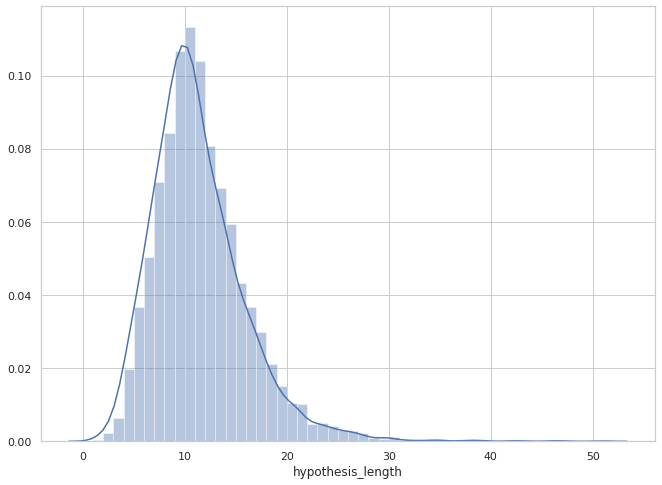

In [23]:
_ = sns.distplot(data.hypothesis_length)

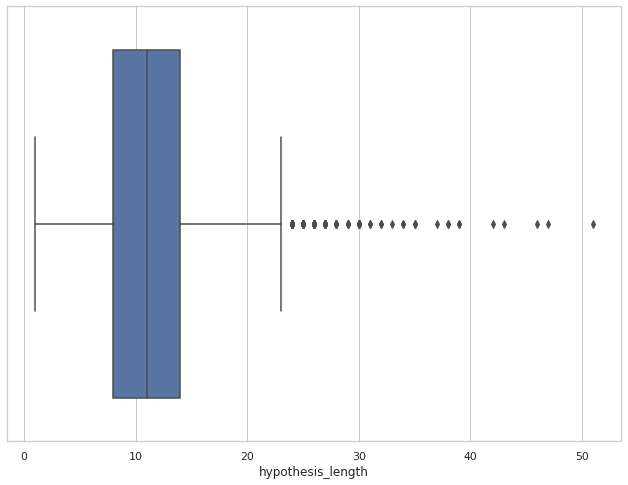

In [24]:
_ = sns.boxplot(x=data.hypothesis_length)

Take look at outliers.

In [25]:
hypotheses_outliers = get_outliers(data, 'hypothesis_length')
hypotheses_outliers

lower bound: -1.0
upper bound: 23.0


,id,premise,hypothesis,lang_abv,language,label,premise_length,hypothesis_length
21,ad5a79456e,Increased saving by current generations would ...,Current generations' increased saving would ex...,en,English,entailment,32,33
67,e390988e6f,The seven grants flow from a new Nonprofit Cap...,The grants flow from a Nonprofit Capacity Buil...,en,English,neutral,39,31
251,685d9362cc,But is the Internet so miraculous an advertisi...,Was the internet so great at advertising that ...,en,English,entailment,47,39
271,006bde060b,"As long as Assad lives, he can manage these tr...","As long as Assad doesn't die in the hurricane,...",en,English,neutral,18,26
425,aadf35db6b,It is housed in a Martello A series of such to...,"A number of these towers, which were built to ...",en,English,entailment,48,26
...,...,...,...,...,...,...,...,...
11770,b75fbc66b1,um i know that i had heard that uh McDonald's ...,McDonald's was sending their hot foods out in ...,en,English,entailment,33,30
11829,791d20b01c,That is exactly what our head coupon issuer Al...,This is what Greenspan did in 1987 and what I ...,en,English,neutral,23,24
11953,fe1d85502a,uh-huh i i thought they did an excellent job o...,Yeah they did a great job with making that per...,en,English,entailment,48,32
11983,368bc8a348,Although it ceased to be a political capital i...,Edinburgh was a focal point in the intellectua...,en,English,entailment,32,24


Look at quite long hypothesis.

In [26]:
hypotheses_outliers.loc[21].hypothesis_length, hypotheses_outliers.loc[21].hypothesis

(33,
 "Current generations' increased saving would expand the nation's capital stock, allowing future generations to more easily afford the nation's retirement costs while also enjoying higher standards of living.")

Look at extra long hypothesis.

In [27]:
longest_hypothesis = hypotheses_outliers[
    hypotheses_outliers.hypothesis_length == hypotheses_outliers.hypothesis_length.max()
].iloc[0]

In [28]:
longest_hypothesis.hypothesis_length, longest_hypothesis.hypothesis

(51,
 'It is thought, but not known, that a lesser percentage of possible deliveries on rural routes are businesses, and part of the reason for the difference in pieces per possible delivery, may be due to the fact that five percent of possible residential deliveries are businesses.')

Even the longest hypothesis is not so long and is quite understandable. Therefore **we will not remove** longer hypothesis.

## Word Frequency

In [29]:
wnl = WordNetLemmatizer()

In [69]:
word_counts = {}

for sentence_source in [data.premise.values, data.hypothesis.values]:
    for sentence in sentence_source:
        for word in word_tokenize(sentence):
            word_lemmatized = wnl.lemmatize(word)
            word_counts[word_lemmatized] = word_counts.get(word_lemmatized, 0) + 1

words, counts = [], []
for word, count in sorted(word_counts.items(), key=lambda x: x[1]):
    words.append(word)
    counts.append(count)
    
word_counts = pd.DataFrame({'word': words, 'frequency': counts})

In [70]:
word_counts

,word,frequency
0,fatally,1
1,crammed,1
2,curd,1
3,coconut,1
4,garland,1
...,...,...
13392,to,5355
13393,of,5497
13394,",",6910
13395,the,10205


In [73]:
word_counts.frequency.describe()

count    13397.000000
mean        16.929835
std        189.061196
min          1.000000
25%          2.000000
50%          3.000000
75%          7.000000
max      11591.000000
Name: frequency, dtype: float64

In the whole dataset is 13,397 unique words. We can see that 75% of all words occur up to 7 times, so there is only a small set of valid words.